In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import seaborn as sns
import random


#neural network skeleton looks like:
##  initialize: set the number of input, hidden, and output nodes
##  train: fine-tune the weights using feedforward and backpropagation methods
##  extract: pull out information from the NN object for analysis

class NN:
    """
    Neural network object that takes in user-defined variables (number of input nodes, hidden nodes, output nodes, and learning rate), 
    initializes all of the weights, and trains the network using feedforward and backprop using gradient descent. The third 
    function queries the NN instance for useful output information.
    """
    # initialize all the elements of the network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
    # weights are randomly choosen using a normal distribution of 0 with a standard deviation raising the number of input nodes to the power of -0.5
        self.input_hidden_weights = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.hidden_output_weights = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        #self.previous_weights_delta_hidden_input = np.zeros((self.inodes,self.hnodes))     # uncomment for backprop with momentum
        #self.previous_weights_delta_output_input = np.zeros((self.hnodes,self.onodes))     # uncomment for backprop with momentum
    # set learning rate
        self.lr = learningrate
    # grab the sigmoid function from the scipy package
        self.activation_function = lambda x: special.expit(x)

        pass
    
    # define function that trains the network
    ## first forward propagation using sigmoid function and dot product matrix multiplication
    ## second backpropagation using gradient descent
    def train(self, inputs_list, targets_list):

        # manipulate inputs into a 2d array 
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        # find the input to hidden dot product
        hidden_inputs = np.dot(self.input_hidden_weights, inputs)
        # calc hidden activations
        hidden_outputs = self.activation_function(hidden_inputs)
        # find the hidden to output dot product
        final_inputs = np.dot(self.hidden_output_weights, hidden_outputs)
        # calc output activations
        final_outputs = self.activation_function(final_inputs)
        # calc error terms
        output_errors = targets - final_outputs
        # hidden to output deltas
        hidden_errors = np.dot(self.hidden_output_weights.T, output_errors)

        # backpropagating to update weights from the output error
        ## output to hidden
        self.hidden_output_weights += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
            np.transpose(hidden_outputs))
        ## hidden to input
        self.input_hidden_weights += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
            np.transpose(inputs))

        pass
    # extract function gets information out of the NN instance to be used on the test set. 
    def extract(self, inputs_list):
        # convert inputs to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T
        # find the input to hidden dot product
        hidden_inputs = np.dot(self.input_hidden_weights, inputs)
        # calc hidden activations
        hidden_outputs = self.activation_function(hidden_inputs)
        # find the hidden to output dot product
        final_inputs = np.dot(self.hidden_output_weights, hidden_outputs)
        # calc output activations
        final_outputs = self.activation_function(final_inputs)
        # return output
        return final_outputs

In [124]:
# empty the lists
del train_scorecard, train_performance, test_scorecard, test_performance, actual, predicted

# MNIST netword parameters
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.1

# create instance
n = NN(input_nodes, hidden_nodes, output_nodes, learning_rate)

# read training data in
#train_data_file = open("mnist_train.csv", 'r')
#train_data = train_data_file.readlines()
#train_data_file.close()

# train for x number of epochs
epochs = 50
train_scorecard = []
train_performance = []

# read in test data
test_data_file = open("mnist_test.csv", 'r')
test_data = test_data_file.readlines()
test_data_file.close()

# create a lists for visualizing output
test_scorecard = []
test_performance = []
actual = []
predicted = []

for e in range(epochs):
    for record in train_data:              # replace with quarter_train_data or half_train_data for experiment 2
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        correct_label = int(all_values[0])
        n.train(inputs, targets)
        outputs = n.extract(inputs)
        label = np.argmax(outputs)
    
        if (label == correct_label):
            train_scorecard.append(1)
        else:
            train_scorecard.append(0)
            pass
    
    train_scorecard_array = np.asarray(train_scorecard)
    train_performance.append(train_scorecard_array.sum() / train_scorecard_array.size)
    print("training performance = ", train_scorecard_array.sum() / train_scorecard_array.size)
    
    # use extract function from NN class to get the trained weights and then test the network on new data
    for record in test_data:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        outputs = n.extract(inputs)
        label = np.argmax(outputs)
        actual.append(correct_label)
        predicted.append(label)

        if (label == correct_label):
            test_scorecard.append(1)
        else:
            test_scorecard.append(0)
            pass
        pass
    test_scorecard_array = np.asarray(test_scorecard)
    test_performance.append(test_scorecard_array.sum() / test_scorecard_array.size)
    print("testing performance = ", test_scorecard_array.sum() / test_scorecard_array.size)
    pass

training performance =  0.9732666666666666
testing performance =  0.9434
training performance =  0.9805
testing performance =  0.9501
training performance =  0.9844888888888889
testing performance =  0.9541333333333334
training performance =  0.9871666666666666
testing performance =  0.95635
training performance =  0.9889933333333333
testing performance =  0.95816
training performance =  0.9903444444444445
testing performance =  0.9594166666666667
training performance =  0.9913619047619048
testing performance =  0.9604714285714285
training performance =  0.9921791666666666
testing performance =  0.9612
training performance =  0.9928481481481481
testing performance =  0.9615888888888889
training performance =  0.9934033333333333
testing performance =  0.96198
training performance =  0.9938878787878788
testing performance =  0.9622272727272727
training performance =  0.9942805555555555
testing performance =  0.9625916666666666
training performance =  0.994625641025641
testing performance

# EXPERIMENT 1: VARYING NUMBER OF HIDDEN LAYER NODES: 20, 50, 100

## HIDDEN LAYER NODES = 20

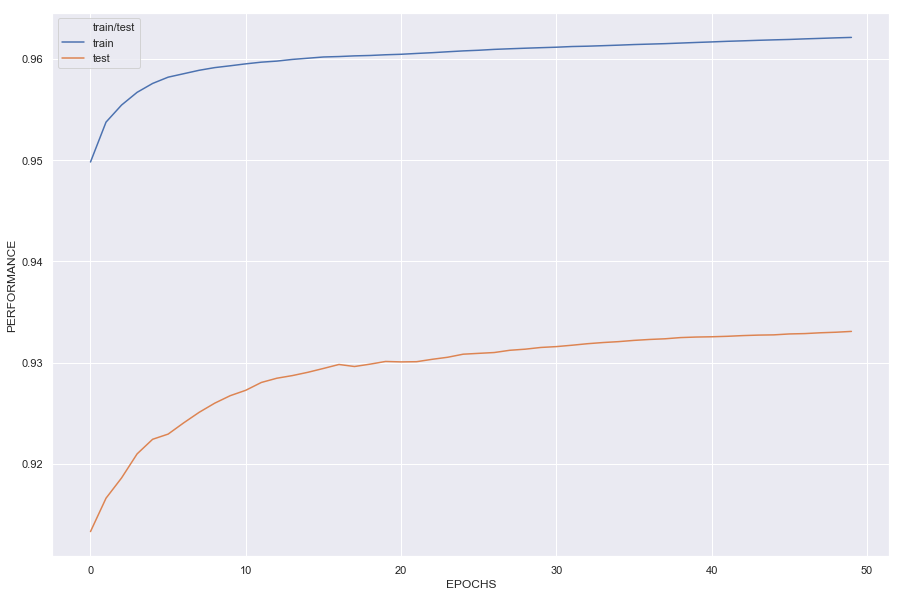

In [75]:
# plot performance
sns.set(rc={'figure.figsize':(15,10)})
performance_20 = np.vstack((train_performance,test_performance)).T
performance_20_df = pd.DataFrame(performance_20).reset_index()
df = performance_20_df.melt('index', var_name='train/test',  value_name='vals')
df['train/test'] = df['train/test'].map({0:'train',1:'test'})
performance_20_plot = sns.lineplot(x="index", y="vals", hue='train/test', data=df)
performance_20_plot.set(xlabel='EPOCHS', ylabel='PERFORMANCE')
plt.savefig('performance_20.png')

In [42]:
# confusion matrix
a_20 = pd.Series(np.asarray(actual))
p_20 = pd.Series(np.asarray(predicted))
confusion_matrix_20 = pd.crosstab(a_20, p_20)
confusion_matrix_20

In [43]:
confusion_matrix_20

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,47724,6,26,66,145,190,420,98,246,79
1,1,55702,128,209,43,113,210,42,273,29
2,490,308,46289,1105,336,368,371,459,1680,194
3,194,72,823,45942,46,1839,44,282,1076,182
4,127,59,82,7,46149,12,573,65,251,1775
5,359,84,150,771,152,40894,561,129,1131,369
6,694,167,300,22,434,870,45076,15,296,26
7,177,491,932,252,251,79,31,47139,422,1626
8,283,555,187,581,265,939,550,164,44911,265


## HIDDEN LAYER NODES = 50

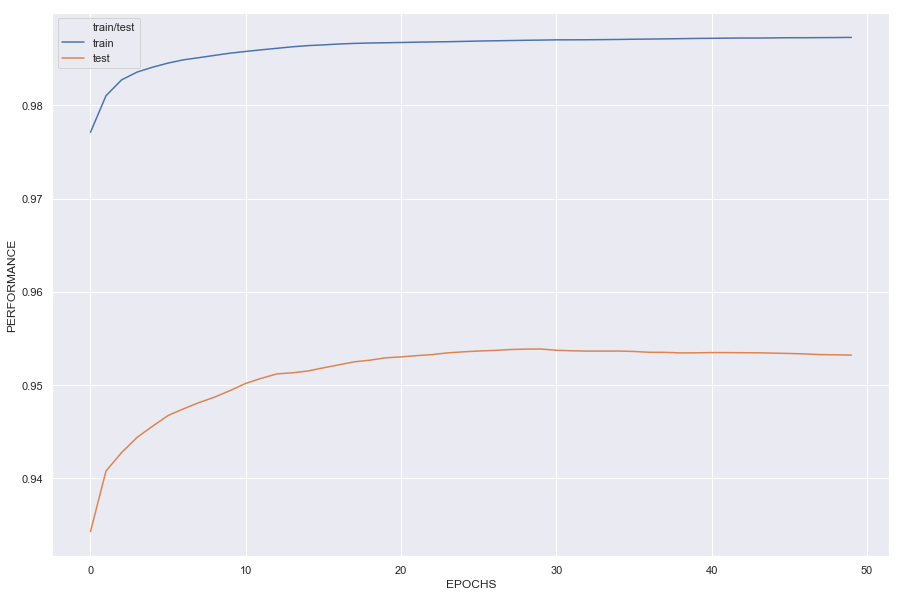

In [78]:
# plot performance
sns.set(rc={'figure.figsize':(15,10)})
performance_50 = np.vstack((train_performance,test_performance)).T
performance_50_df = pd.DataFrame(performance_50).reset_index()
df = performance_50_df.melt('index', var_name='train/test',  value_name='vals')
df['train/test'] = df['train/test'].map({0:'train',1:'test'})
performance_50_plot = sns.lineplot(x="index", y="vals", hue='train/test', data=df)
performance_50_plot.set(xlabel='EPOCHS', ylabel='PERFORMANCE')
plt.savefig('performance_50.png')

In [79]:
# confusion matrix
a_50 = pd.Series(np.asarray(actual))
p_50 = pd.Series(np.asarray(predicted))
confusion_matrix_50 = pd.crosstab(a_50, p_50)
confusion_matrix_50

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,48287,7,19,43,25,118,172,147,152,30
1,10,56045,121,108,6,60,100,47,230,23
2,525,221,48320,708,153,73,195,517,694,194
3,176,87,378,47401,28,997,71,344,540,478
4,54,38,151,1,46440,11,595,117,163,1530
5,286,173,23,613,66,42278,361,155,405,240
6,540,148,120,30,178,479,46078,16,267,44
7,119,547,598,152,243,65,37,48557,326,756
8,511,167,119,367,326,654,428,249,45583,296


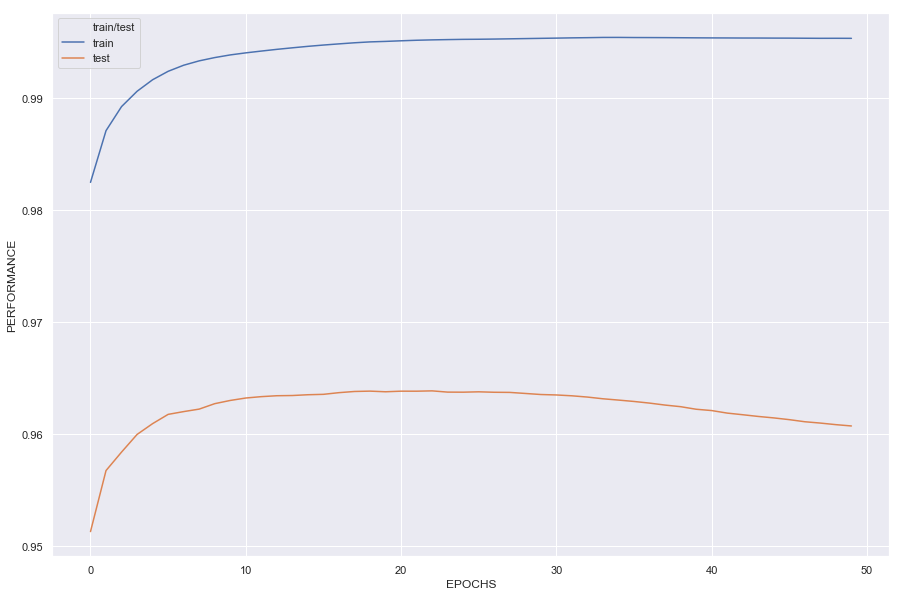

In [81]:
# plot performance
sns.set(rc={'figure.figsize':(15,10)})
performance_100 = np.vstack((train_performance,test_performance)).T
performance_100_df = pd.DataFrame(performance_100).reset_index()
df = performance_100_df.melt('index', var_name='train/test',  value_name='vals')
df['train/test'] = df['train/test'].map({0:'train',1:'test'})
performance_100_plot = sns.lineplot(x="index", y="vals", hue='train/test', data=df)
performance_100_plot.set(xlabel='EPOCHS', ylabel='PERFORMANCE')
plt.savefig('performance_100.png')

In [82]:
# confusion matrix
a_100 = pd.Series(np.asarray(actual))
p_100 = pd.Series(np.asarray(predicted))
confusion_matrix_100 = pd.crosstab(a_100, p_100)
confusion_matrix_100

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,48533,14,5,112,23,50,108,45,80,30
1,14,56083,116,101,26,81,105,56,137,31
2,392,186,48701,463,195,9,210,350,994,100
3,91,77,217,48355,12,608,17,209,589,325
4,100,1,44,1,46843,1,446,55,92,1517
5,222,92,22,619,64,42006,423,144,683,325
6,349,174,59,57,114,374,46402,6,360,5
7,107,379,557,189,79,4,5,48940,241,899
8,272,168,82,496,289,217,335,164,46337,340


# EXPERIMENT 2: VARYING AMOUNT OF TRAINING DATA: ONE QUARTER AND ONE HALF

## ONE QUARTER

In [ ]:
# shuffle and sample
np.random.shuffle(train_data)
quarter_train_data = train_data[:15000]

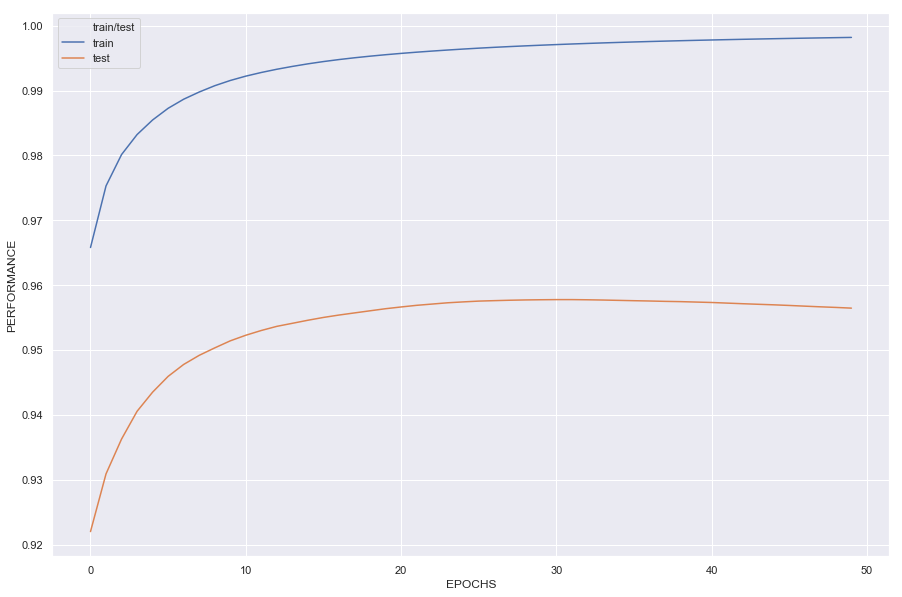

In [121]:
# plot performance
sns.set(rc={'figure.figsize':(15,10)})
performance_quarter = np.vstack((train_performance,test_performance)).T
performance_quarter_df = pd.DataFrame(performance_quarter).reset_index()
df = performance_quarter_df.melt('index', var_name='train/test',  value_name='vals')
df['train/test'] = df['train/test'].map({0:'train',1:'test'})
performance_quarter_plot = sns.lineplot(x="index", y="vals", hue='train/test', data=df)
performance_quarter_plot.set(xlabel='EPOCHS', ylabel='PERFORMANCE')
plt.savefig('performance_quarter.png')

In [122]:
# confusion matrix
a_quarter = pd.Series(np.asarray(actual))
p_quarter = pd.Series(np.asarray(predicted))
confusion_matrix_quarter = pd.crosstab(a_quarter, p_quarter)
confusion_matrix_quarter

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,48273,0,23,42,44,132,168,62,198,58
1,12,55854,170,142,1,103,133,19,316,0
2,516,4,49290,296,274,88,126,588,341,77
3,91,13,603,48014,51,723,24,296,468,217
4,66,3,103,0,47752,4,209,66,83,814
5,314,74,51,797,131,42178,286,174,386,209
6,409,150,156,126,308,477,46003,0,266,5
7,41,232,877,201,301,18,0,48677,90,963
8,332,80,244,471,601,452,381,245,45326,568


## ONE HALF

In [123]:
# shuffle and sample
np.random.shuffle(train_data)
half_train_data = train_data[:30000]

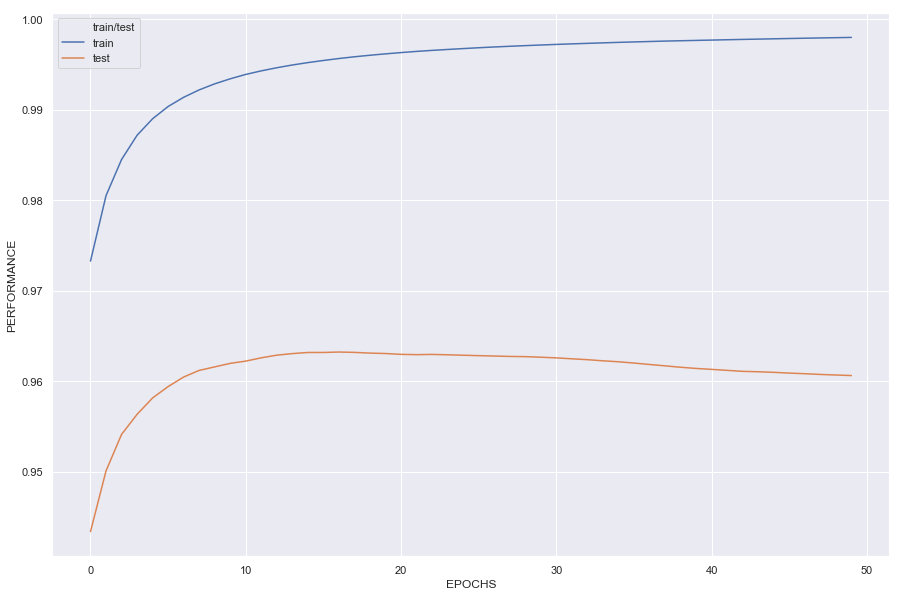

In [125]:
# plot performance
sns.set(rc={'figure.figsize':(15,10)})
performance_half = np.vstack((train_performance,test_performance)).T
performance_half_df = pd.DataFrame(performance_half).reset_index()
df = performance_half_df.melt('index', var_name='train/test',  value_name='vals')
df['train/test'] = df['train/test'].map({0:'train',1:'test'})
performance_half_plot = sns.lineplot(x="index", y="vals", hue='train/test', data=df)
performance_half_plot.set(xlabel='EPOCHS', ylabel='PERFORMANCE')
plt.savefig('performance_half.png')

In [126]:
# confusion matrix
a_half = pd.Series(np.asarray(actual))
p_half = pd.Series(np.asarray(predicted))
confusion_matrix_half = pd.crosstab(a_half, p_half)
confusion_matrix_half

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,48139,9,129,48,53,90,240,113,94,85
1,6,55568,305,122,24,66,102,106,444,7
2,280,16,49491,307,181,41,116,341,769,58
3,60,10,675,48082,22,567,22,237,576,249
4,74,35,214,5,47141,5,278,53,194,1101
5,173,42,107,1077,116,41853,498,119,399,216
6,229,117,190,41,233,208,46562,2,302,16
7,159,170,675,129,190,29,37,49100,202,709
8,284,55,254,179,341,118,257,233,46701,278
